In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

path = ("../CorsoEpicode/Esame M3/owid-covid-data.csv")
covid = pd.read_csv(path)

### Prima di effettuare le analisi, effettuate un'EDA del dataset:

In [152]:
#Prima overview dei dati
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [153]:
#Visualizzazione delle info generali
print(f"Dimensioni: {covid.shape}")
display(covid.dtypes)
display(covid.info())

Dimensioni: (429435, 67)


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

None

In [154]:
#Analisi delle colonne numeriche 
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [155]:
# Analisi delle colonne categoriche
for column in covid.columns:
    if covid[column].dtype=='object':
        print(f"La colonna {column} contiene dati categorici.")
        unique_count=covid[column].nunique()
        print(f"La colonna {column} contiene {unique_count} valori unici")
        all_count=covid[column].value_counts()
        print(f"La distribuzione di ogni valore unico è: ")
        print(all_count)
        print()

La colonna iso_code contiene dati categorici.
La colonna iso_code contiene 255 valori unici
La distribuzione di ogni valore unico è: 
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

La colonna continent contiene dati categorici.
La colonna continent contiene 6 valori unici
La distribuzione di ogni valore unico è: 
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

La colonna location contiene dati categorici.
La colonna location contiene 255 valori unici
La distribuzione di ogni valore unico è: 
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries      

In [176]:
#Individuazione dei dati nulli
for column in covid.columns:
    nan_count=covid[column].isna().sum()
    nan_percentage=round((nan_count/covid.shape[0])*100,2)
    print(f"La colonna {column} contiene {nan_count} valori NaN, {nan_percentage}% di tutte le righe")

#Altro metodo
covid.isna().sum()

La colonna iso_code contiene 0 valori NaN, 0.0% di tutte le righe
La colonna continent contiene 26525 valori NaN, 6.18% di tutte le righe
La colonna location contiene 0 valori NaN, 0.0% di tutte le righe
La colonna date contiene 0 valori NaN, 0.0% di tutte le righe
La colonna total_cases contiene 17631 valori NaN, 4.11% di tutte le righe
La colonna new_cases contiene 19276 valori NaN, 4.49% di tutte le righe
La colonna new_cases_smoothed contiene 20506 valori NaN, 4.78% di tutte le righe
La colonna total_deaths contiene 17631 valori NaN, 4.11% di tutte le righe
La colonna new_deaths contiene 18827 valori NaN, 4.38% di tutte le righe
La colonna new_deaths_smoothed contiene 20057 valori NaN, 4.67% di tutte le righe
La colonna total_cases_per_million contiene 17631 valori NaN, 4.11% di tutte le righe
La colonna new_cases_per_million contiene 19276 valori NaN, 4.49% di tutte le righe
La colonna new_cases_smoothed_per_million contiene 20506 valori NaN, 4.78% di tutte le righe
La colonna tot

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
excess_mortality_cumulative_per_million    416024
year                                            0
month                                           0
day                                             0
weekday                                         0
Length: 71, dtype: int64

In [179]:
#Info sulle colonne continent e location
display(covid["continent"].nunique()) #i valori nullli non sono considerati dalla query

covid["location"].value_counts() #ci sono delle istanze in cui vengono aggregate delle regioni 

6

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland                         1305
Wales                            1198
Macao                             795
Northern Cyprus                   691
Western Sahara                      1
Name: count, Length: 255, dtype: int64

In [157]:
#Visualizzazione new_cases, total_casess

covid[["new_cases", "total_cases"]].value_counts() #controllando i metadati su github, si nota come i dati ti total_cases siano aggregati 

new_cases   total_cases
0.0         0.0            29304
            1.0             1584
            26.0            1571
            4.0             1464
            3.0              954
                           ...  
133.0       2134.0             1
            4153.0             1
            5535.0             1
            11160.0            1
44236227.0  704630839.0        1
Name: count, Length: 77655, dtype: int64

1. Si richiede di verificare le dimensioni del dataset e i relativi metadati


2. Si chiede di trovare, per ogni continente:

    a. il numero di casi fin dall'inizio della pandemia


    b. la percentuale rispetto al totale mondiale del numero di casi

3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno
misurazioni; quindi mostrare con dei grafici adeguati:


   a. l'evoluzione del casi totali dall'inizio alla fine dell'anno


    b. il numero di nuovi casi rispetto alla data

4. Riguardo le nazioni di Italia, Germania e Francia:


   a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU,
    considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)


    b.scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante

6. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:


   a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)


   b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [158]:
#1 
print(f"La dimensione del dataset: {covid.shape}")
print(f"I metadati: {covid.dtypes}")

La dimensione del dataset: (429435, 67)
I metadati: iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object


In [159]:
#2.a 
#raggruppo per avere contezza dei casi di ogni paese per continente, e successivamente sommo i casi per paese raggruppati per continente.
#(Nonostante come visto prima, ci sono delle istanze che riportano piccole regioni, volendo trovare il numero dei casi per continente non è un problema)
total_continent_cases=covid.groupby(["continent", "location"])["total_cases"].max().groupby("continent").sum()
total_continent_cases
#in questa query non sono considerati i dati aggregati riscontrati precedentemente,dove nella colonna continent abbiamo NaN, 
#quindi escludiamo eventuali errori dall'analisi

continent
Africa            13145540.0
Asia             301532347.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

In [160]:
#2.b
#(total_continent_case/total_global_cases)*100 %
total_global_cases = covid["total_cases"].max()  #per conoscere il numero totale dei casi nel mondo 
percentuale = (total_continent_cases/total_global_cases)*100 #per ottenere la percentuale di ogni continente rispetto al mondo 

for continent,percent in percentuale.items():
    print(f"{continent} : {round(percent,2)} %")

Africa : 1.69 %
Asia : 38.86 %
Europe : 32.6 %
North America : 16.05 %
Oceania : 1.93 %
South America : 8.87 %


In [180]:
#3 Formatto la colonna 'date' in un formato data, vista la richiesta del punto 3 

covid["date"] = pd.to_datetime(covid["date"])

#controllo se la conversione è avvenuta nel formato giusto 

covid.info()

#creo delle colonne circa l'anno, il mese e il giorno 

covid["year"] = covid["date"].dt.year
covid["month"] = covid["date"].dt.month
covid["day"] = covid["date"].dt.day
covid["weekday"] = covid["date"].dt.dayofweek


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 71 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [162]:
#3 Filtro il DataFrame per l'Italia, l'anno 2022 e i soli giorni della settimana che contengono misurazioni riguardo "new_cases"
location = covid["location"]=="Italy"
anno = covid["year"] == 2022
misurazioni = covid["new_cases"] > 0
ita22 = covid.loc[location & anno & misurazioni] 
ita22

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,weekday
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,0.892,59037472,168226.30,12.99,8.06,2849.4834,2022,1,2,6
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,144894.571,138881.0,1368.0,195.429,...,0.892,59037472,168831.80,12.89,3.94,2859.7395,2022,1,9,6
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,181164.714,140856.0,1975.0,282.143,...,0.892,59037472,170089.10,12.83,8.03,2881.0361,2022,1,16,6
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,175963.000,143296.0,2440.0,348.571,...,0.892,59037472,171694.19,12.80,10.40,2908.2239,2022,1,23,6
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,148597.714,145914.0,2618.0,374.000,...,0.892,59037472,174151.69,12.84,16.50,2949.8500,2022,1,30,6
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,103059.714,148542.0,2628.0,375.429,...,0.892,59037472,176219.19,12.85,13.98,2984.8700,2022,2,6,6
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,72933.857,150824.0,2282.0,326.000,...,0.892,59037472,177489.48,12.81,8.88,3006.3870,2022,2,13,6
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,53491.857,152848.0,2024.0,289.143,...,0.892,59037472,178007.39,12.72,3.66,3015.1594,2022,2,20,6
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,43558.143,154416.0,1568.0,224.000,...,0.892,59037472,178015.30,12.60,0.06,3015.2935,2022,2,27,6
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,36791.857,155782.0,1366.0,195.143,...,0.892,59037472,178133.80,12.48,0.86,3017.3005,2022,3,6,6


In [163]:
#3.a Creo un lineplot per visualizzare l'andamento di "totale_cases" in Italia nel 2022:
#prima setto la data come indice del df
ita22 = ita22.set_index("date")

<Axes: title={'center': 'Casi totali COVID-19 - Italia 2022'}, xlabel='date'>

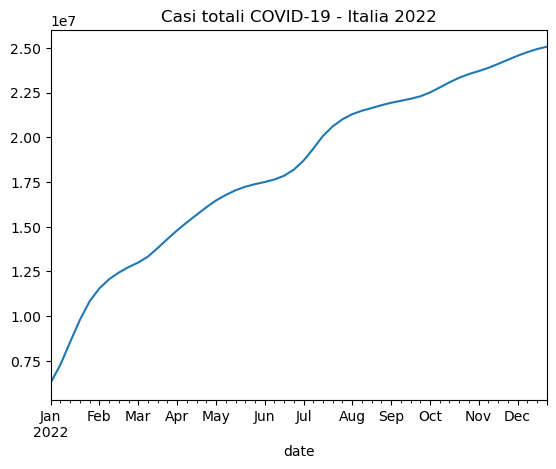

In [164]:
#e dopo creo il grafico
ita22["total_cases"].plot(title="Casi totali COVID-19 - Italia 2022")

<Axes: title={'center': 'Nuovi casi COVID-19 - Italia 2022'}, xlabel='date'>

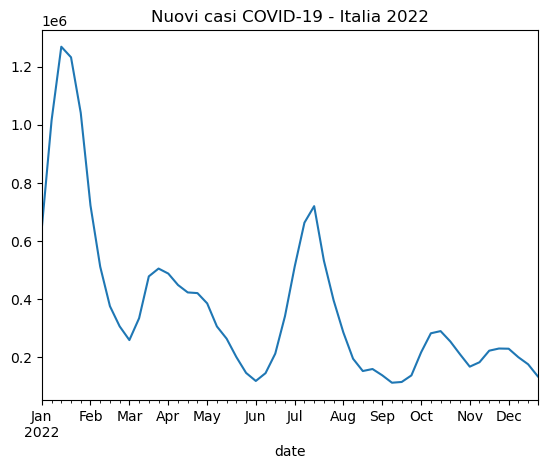

In [165]:
#3b Creo il grafico inerente ai nuovi casi in Italia nel 2022:
ita22["new_cases"].plot(title="Nuovi casi COVID-19 - Italia 2022")

In [166]:
#4. Per filtrare per i paesi interessati creo una lista e uso il metodo .isin()
paesi_di_interesse= ["Italy", "France", "Germany"]
filtro_paese= covid["location"].isin(paesi_di_interesse)

paesi = covid.loc[filtro_paese]

paesi["location"].value_counts() #controllo se in location ho solo i paesi desiderati 

location
Italy      1677
France     1674
Germany    1674
Name: count, dtype: int64

In [170]:
#creo un filtro per includere i dati raccolti tra maggio 2022 e aprile 2023
anno2022 = paesi["year"] == 2022
anno2023 = paesi["year"] == 2023
month2022 = paesi["month"].between(5, 12)  
month2023 = paesi["month"].between(1, 4) 

In [177]:
#adesso utilizzo i filtri paesi e delle date con gli operatori logici  
paesi23 = paesi.loc[(anno2022 & month2022) | (anno2023 & month2023)]
paesi23 #subset contenente i dati riguardanti i tre paesi in esame durante il periodo 5/2022 - 4/2023

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,weekday
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,0.901,67813000,89536.72,6.19,6.24,1385.4463,2022,5,1,6
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,0.901,67813000,NaN,NaN,NaN,NaN,2022,5,2,0
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,0.901,67813000,NaN,NaN,NaN,NaN,2022,5,3,1
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,0.901,67813000,NaN,NaN,NaN,NaN,2022,5,4,2
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,0.901,67813000,NaN,NaN,NaN,NaN,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,0.892,59037472,NaN,NaN,NaN,NaN,2023,4,26,2
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,0.892,59037472,NaN,NaN,NaN,NaN,2023,4,27,3
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,0.892,59037472,NaN,NaN,NaN,NaN,2023,4,28,4
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,0.892,59037472,NaN,NaN,NaN,NaN,2023,4,29,5


<Axes: xlabel='location', ylabel='icu_patients'>

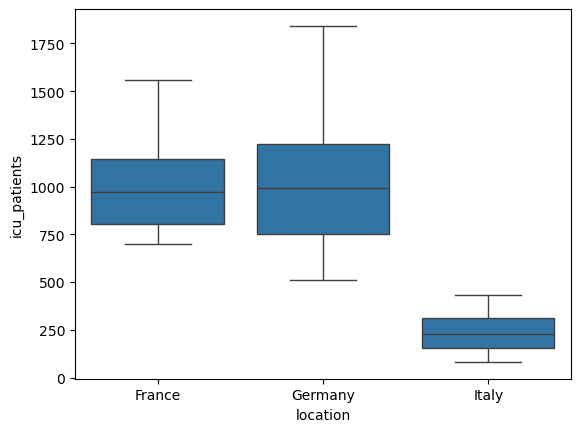

In [172]:
#4.a Creiamo il boxplot settando i valori in esame sugli assi

sns.boxplot(data=paesi23, x = "location", y = "icu_patients")

4.b L’Italia ha avuto un numero significativamente inferiore di pazienti in terapia intensiva rispetto a Francia e Germania, che invece mostrano valori simili ma con una maggiore variabilità in Germania: addirittura, il massimo dell'Italia è molto al di sotto del massimo della Francia, "sfiorando" quello della Germania.
L’Italia potrebbe aver avuto una pressione minore sulle terapie intensive in quel periodo rispetto a Francia e Germania, oppure ci potrebbero essere differenze nei criteri di ricovero in terapia intensiva, capacità del sistema sanitario, o andamento dei contagi. 

In [173]:
#5 Uso una nuova lista per filtrare solo i paesi desiderati con .isin() e uso un filtro per l'anno 2021
lista_paesi = ["Italy", "France", "Germany", "Spain"]
fil_paesi= covid["location"].isin(lista_paesi)
filtro_anno = covid["year"] == 2021

paesi2021= covid.loc[fil_paesi & filtro_anno]
paesi2021[["location","year"]].nunique() #controllo se ho solo location e anno desiderati

location    4
year        1
dtype: int64

location
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

<Axes: xlabel='location'>

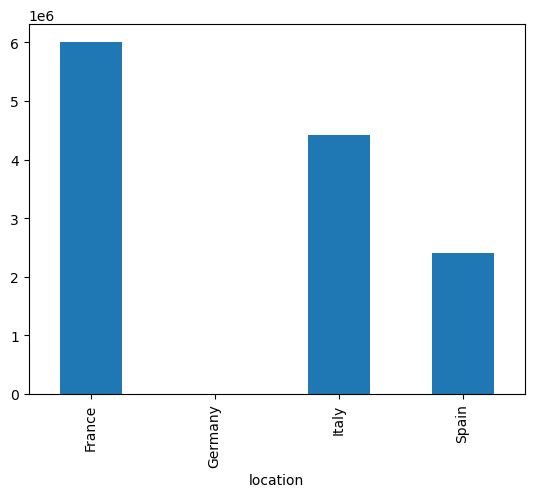

In [174]:
#5.a Raggruppiamo i paesi per location e sommiamo il numero di pazienti ospedalizzati in un dato giorno ("hosp_patients")
display(paesi2021.groupby("location")["hosp_patients"].sum())

#con la stessa query realizziamo un grafico 
paesi2021.groupby("location")["hosp_patients"].sum().plot(kind="bar")

Vediamo che sono totalmente assenti dati riguardo ai pazienti ospedalizzati in Germania, non solo nel 2021, ma utilizzando

covid.loc[covid["location"] == "Germany"].groupby("year")["hosp_patients"].sum()

 vediamo che per tutti gli anni non abbiamo contezza dell'argomento. La colonna non presenta dati nulli ma dei float, tutti uguali a 0. 
Non è il caso di rimpiazzare i dati provando una sostituzione con un metodo matematico come interpolazione o media di altri dati, poiché inficierebbe la validità di un'analisi sul dataset. Il caso migliorebbe, a mio avviso, sarebbe quello di utilizzare un altro dataset contenente i dati mancanti ed utilizzare un merge per poterli acquisire, ad esempio:

supponendo di avere un df2 con colonne "date" e "hosp_patients" inerenti alla Germania:

- possiamo selezionare le righe di paesi2021 con location == Germania e il valore hosp_patients == 0.0 (possiamo chiamare questo filtro 'mask') ed estraiamo le righe di paesi2021  con queste caratteristiche: germania = paesi2021[mask]

  

- effettuiamo un merge usando "date" come colonna di riferimento: germania_aggiornata = germania.merge(df2, on = "date")

- aggioniamo i valori mancanti usando 'mask' di prima in paesi2021: paesi2021.loc[mask, "hosp_patients"] = germania_aggiornata["hosp_patients"]



In assenza di un dataset simile, si potrebbero rimpiazzare i valori 0.0 con None:

covid.loc[(covid["location"] == "Germany") & (covid["hosp_patients"] == 0.0), "hosp_patients"] = None

In [175]:
covid.loc[covid["location"] == "Germany"].groupby("year")["hosp_patients"].sum()

year
2020    0.0
2021    0.0
2022    0.0
2023    0.0
2024    0.0
Name: hosp_patients, dtype: float64